In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
from shapely.geometry import Point

In [2]:
#dataset : https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/3KQFUT

In [3]:
df = pd.read_excel('AncientPorts_Europe.xlsx')

In [4]:
df

,NAME,NAME_MOD,COUNTRY,LATITUDE,LONGITUDE
0,"Tyle, Thule","Iceland? Pliny and Strabo, who cite Pytheas (c...",Iceland,63.274770,-14.761314
1,"Export of amber to the Black Sea, on R Chesino...","Daugmale, on R Daugava, Dvina, Düna",Latvia,56.825000,24.410000
2,"Basileia, Basilia, Baltia, Ile Royale, between...","Sambia, Samland? near Kaliningrad, famous for ...",Russia,54.900000,20.000000
3,"Abalus insula, Saxonum insulae? near Elektride...",Isles of Helgoland? near Frisian islands in fr...,Germany,54.182500,7.885280
4,R Visurgis,"Roman statio at Bremen-Seehausen, on R Weser",Germany,53.122000,8.682000
...,...,...,...,...,...
3495,"Pinturia, Centuria, Ninguaria, Nivaria insula",Isla Tenerife,Spain,28.300000,-16.600000
3496,"Casperia, Capraria insula",Isla La Gomera,Spain,28.140000,-17.230000
3497,Ombrios insula,"Isla La Palma, La Bonita",Spain,28.646000,-17.842900
3498,"Junonia, Juno insula",Isla El Hierro,Spain,29.251000,-13.507000


In [5]:
country_counts = df.groupby('COUNTRY').size().reset_index(name='counts').sort_values(by='counts', ascending=False).reset_index(drop=True)
country_counts.index = country_counts.index + 1

In [6]:
country_counts.head()

,COUNTRY,counts
1,Greece,886
2,Turkey,658
3,Italy,501
4,France,186
5,Egypt,175


In [15]:
df = df.sample(n=800)

In [16]:
geometry = [Point(xy) for xy in zip(df.LONGITUDE, df.LATITUDE)]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:3857")

In [17]:
top_5_countries = country_counts.head(5)
others_count = country_counts['counts'][5:].sum()
top_5_labels = list(top_5_countries['COUNTRY']) + ['Others']
top_5_counts = list(top_5_countries['counts']) + [others_count]

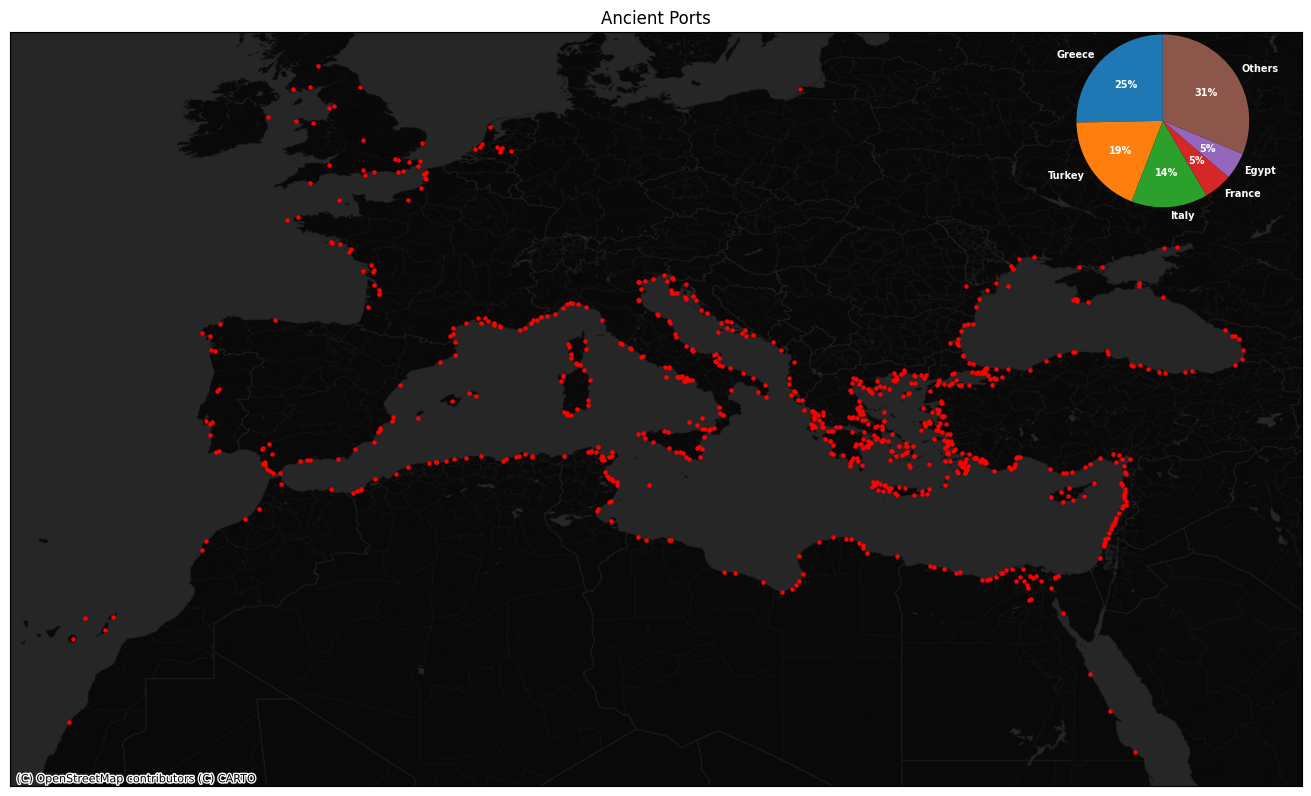

In [32]:
fig, ax = plt.subplots(figsize=(13, 12), constrained_layout=True)

gdf.plot(ax=ax, color="red", markersize=5)

ctx.add_basemap(ax, crs="EPSG:4326", source=ctx.providers.CartoDB.DarkMatterNoLabels, zoom=6)

inset_ax = fig.add_axes([0.8, 0.65, 0.18, 0.18])
inset_ax.pie(top_5_counts, labels=top_5_labels, autopct='%1.0f%%', startangle=90, textprops={'color':"white", 'fontsize': 7, 'fontweight': 'bold'})

ax.set_title('Ancient Ports')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticks([])
ax.set_yticks([])

plt.savefig('Ancient_Ports.png', dpi=300, bbox_inches='tight')
plt.show()